In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('premierleague_profiles.csv')

In [3]:
# Sample of df
df.head(10)

,Full name:,Date of birth:,Place of birth:,Age:,Height:,Citizenship:,Position:,Foot:,Player agent:,Current club:,...,Date of last contract extension:,Outfitter:,Social-Media:,Market Value,Name in home country:,Contract option:,2nd club:,3nd club:,On loan from:,Contract there expires:
0,Ederson,"Aug 17, 1993",Osasco (SP),28,"1,88 m",Brazil Portugal,Goalkeeper ...,left,Gestifute,Manchester City,...,"Sep 1, 2021",Puma,,$49.50m,NaN,NaN,NaN,NaN,NaN,NaN
1,Stefan Ortega,"Nov 6, 1992",Hofgeismar,29,"1,85 m",Germany Spain,Goalkeeper ...,right,neblung sportsnetwork,Manchester City,...,NaN,NaN,,$6.60m,Stefan Ortega Moreno,NaN,NaN,NaN,NaN,NaN
2,Scott Carson,"Sep 3, 1985",Whitehaven,36,"1,88 m",England,Goalkeeper ...,right,Wasserman,Manchester City,...,"Jun 14, 2022",Puma,,$330Th.,Scott Paul Carson,NaN,NaN,NaN,NaN,NaN
3,Ruben Dias,"May 14, 1997",Amadora,25,"1,87 m",Portugal,Defender - Centre-...,right,Gestifute,Manchester City,...,"Aug 30, 2021",Nike,,$82.50m,Rúben Santos Gato Alves Dias,NaN,NaN,NaN,NaN,NaN
4,Aymeric Laporte,"May 27, 1994",Agen,28,"1,89 m",Spain France,Defender - Centre-...,left,Wasserman,Manchester City,...,"Feb 22, 2019",adidas,,$49.50m,Aymeric Jean Louis Gerard Alphonse Laporte,NaN,NaN,NaN,NaN,NaN
5,John Stones,"May 28, 1994",Barnsley,28,"1,88 m",England,Defender - Centre-...,right,Wasserman,Manchester City,...,"Aug 10, 2021",Nike,,$30.80m,NaN,NaN,NaN,NaN,NaN,NaN
6,Nathan Ake,"Feb 18, 1995",Den Haag,27,"1,80 m",Netherlands Cote d'Ivoire ...,Defender - Centre-...,left,Wasserman,Manchester City,...,NaN,Nike,,$27.50m,Nathan Benjamin Aké,NaN,NaN,NaN,NaN,NaN
7,Benjamin Mendy,"Jul 17, 1994",Longjumeau,28,"1,85 m",France Senegal,Defender - Left-Ba...,left,Sport Cover,Manchester City,...,NaN,adidas,,-,NaN,NaN,NaN,NaN,NaN,NaN
8,Joao Cancelo,"May 27, 1994",Barreiro,28,"1,82 m",Portugal,Defender - Right-B...,right,Gestifute,Manchester City,...,"Feb 1, 2022",Nike,,$71.50m,João Pedro Cavaco Cancelo,NaN,NaN,NaN,NaN,NaN
9,Kyle Walker,"May 28, 1990",Sheffield,32,"1,83 m",England,Defender - Right-B...,right,CAA Base Ltd,Manchester City,...,"Jun 19, 2019",Puma,,$19.80m,Kyle Andrew Walker,NaN,NaN,NaN,NaN,NaN


In [4]:
# Shape
df.shape

(548, 22)

In [5]:
# Figuring out the NA values
df.isna().sum()

Full name:                                                             0
Date of birth:                                                         0
Place of birth:                                                        4
Age:                                                                   0
Height:                                                                2
Citizenship:                                                           0
Position:                                                              0
Foot:                                                                  2
Player agent:                                                         69
                            Current club:                              0
Joined:                                                                0
Contract expires:                                                      0
Date of last contract extension:                                     323
Outfitter:                                         

In [6]:
# You might need this later when there is more data
train, test = sk.model_selection.train_test_split(df, train_size = 0.2)

If there is no height, I will delete those rows

In [7]:
# Dropping rows with no height
df = df[df['Height:'].notnull()]
df = df[df['Market Value'].notnull()]

# Taking only numbers
df['Height:'] = df['Height:'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [8]:
# Looking into heights
df['Height:'].describe()

count    545.000000
mean     182.559633
std        7.038799
min      163.000000
25%      178.000000
50%      183.000000
75%      188.000000
max      204.000000
Name: Height:, dtype: float64

Text(0.5, 1.0, 'Spread of Height')

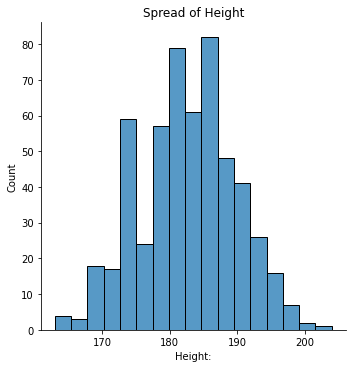

In [9]:
# Showing Height
sns.displot(df['Height:'])
plt.title("Spread of Height")

Text(0.5, 1.0, 'Spread of Height')

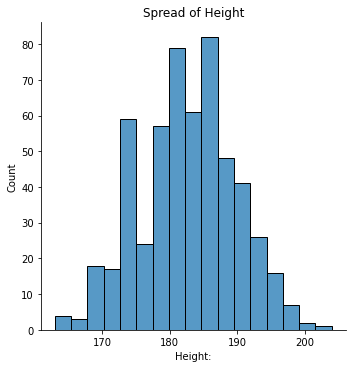

In [10]:
# Showing Market Valuation
sns.displot(df['Height:'])
plt.title("Spread of Height")

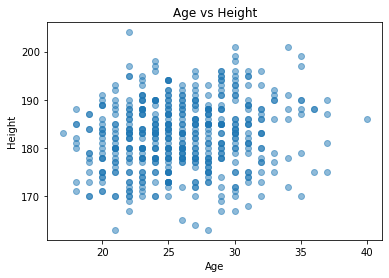

In [11]:
# Just testing out plottting
x = df['Age:']
y = df['Height:']

plt.scatter(x, y, alpha=0.5)
plt.title("Age vs Height")
plt.xlabel("Age")
plt.ylabel("Height")
plt.show()

In [12]:
df['Citizenship:'].value_counts()

# Split Citizenship into 2 Columns

df[['Citizenship 1', 'Citizenship 2']] = df['Citizenship:'].str.split(n=1, expand=True)

In [13]:
# Changing positions to be more specific
df[['Position 1', 'Position 2']] = df['Position:'].str.split(' - ', n=1, expand=True)
df['Position 2'].value_counts()

Centre-Back                                   103
Central Midfield                               72
Centre-Forward                                 55
Right-Back                                     48
Left Winger                                    42
Defensive Midfield                             41
Left-Back                                      40
Right Winger                                   38
Attacking Midfield                             34
Left Midfield                                   7
Right Midfield                                  4
Second Striker                                  4
Name: Position 2, dtype: int64